## Information: 1

The Central Limit Theorem states that the sum $Z = X_1 +...+ X_n$ of n independent identically distributed (iid) random variables is approximately normally distributed for large n. In fact, if $X_1,... X_n$ have mean $\mu$ and variance $\sigma^2$, then the standardised sum $Z_s=((X_1-\mu) + ... + (X_n-\mu))/(\sqrt{n\sigma^2})$  has a standard normal distribution $N(0,1)$ for large n. Let us illustrate this result in the case where $X_i$ follows the uniform distribution on the interval [-1,1].

Generate a random sample $x$ of $n = 500$ independent draws from the uniform distribution on the interval [-1,1].
Plot the result in a histogram.

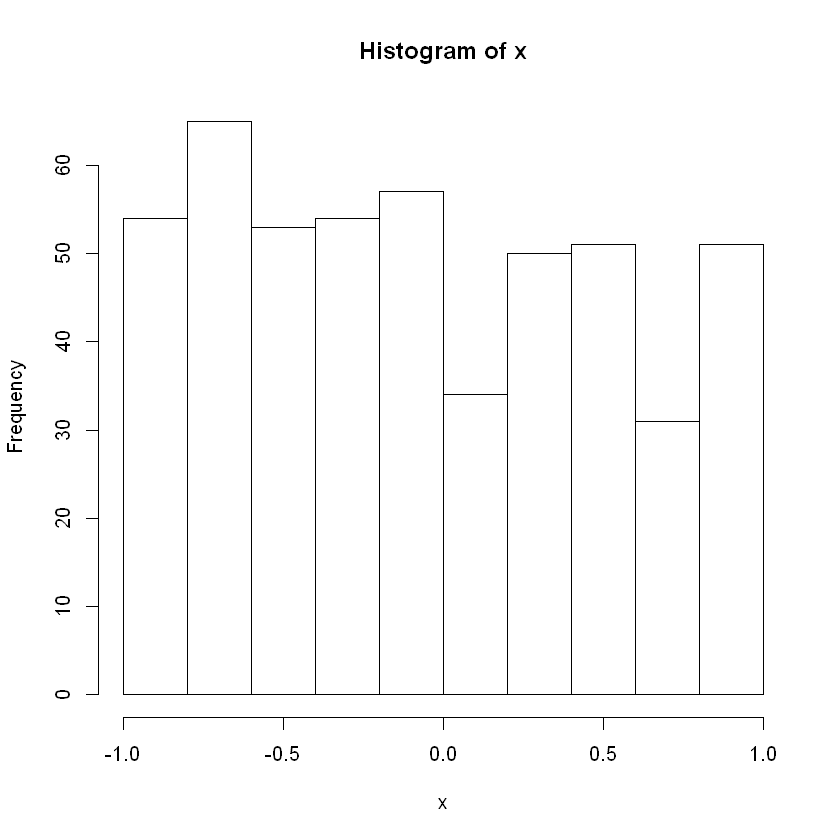

In [1]:
x <- runif(500,min=-1,max=1)
hist(x)

Write a function `func` that takes n as input, generates a random sample $x$ of $n$ independent draws from the uniform distribution on the interval [-1,1] and returns the sum of these draws.

In [2]:
func <- function(n){
  x <- runif(n,min=-1,max=1)
  sum(x)
}

Use this function to generate $N = 1000$ such sums for n = 500, that is, generate a sample of size $N = 1000$ 
for the variable $Z$. Plot a histogram of the result. Use `qqnorm` to check that the sums follow a normal distribution.

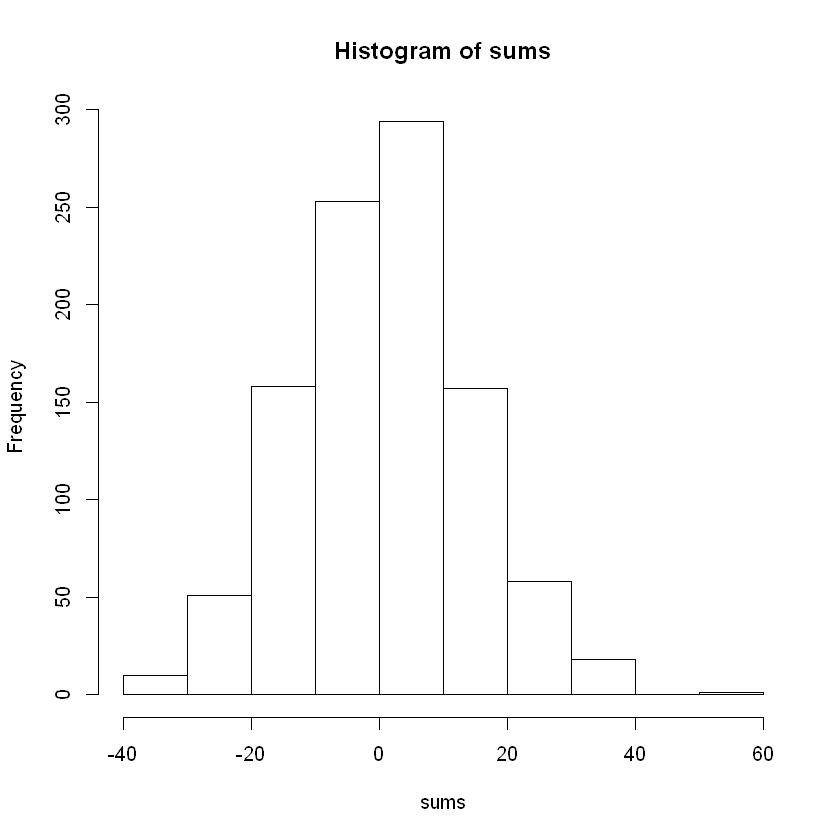

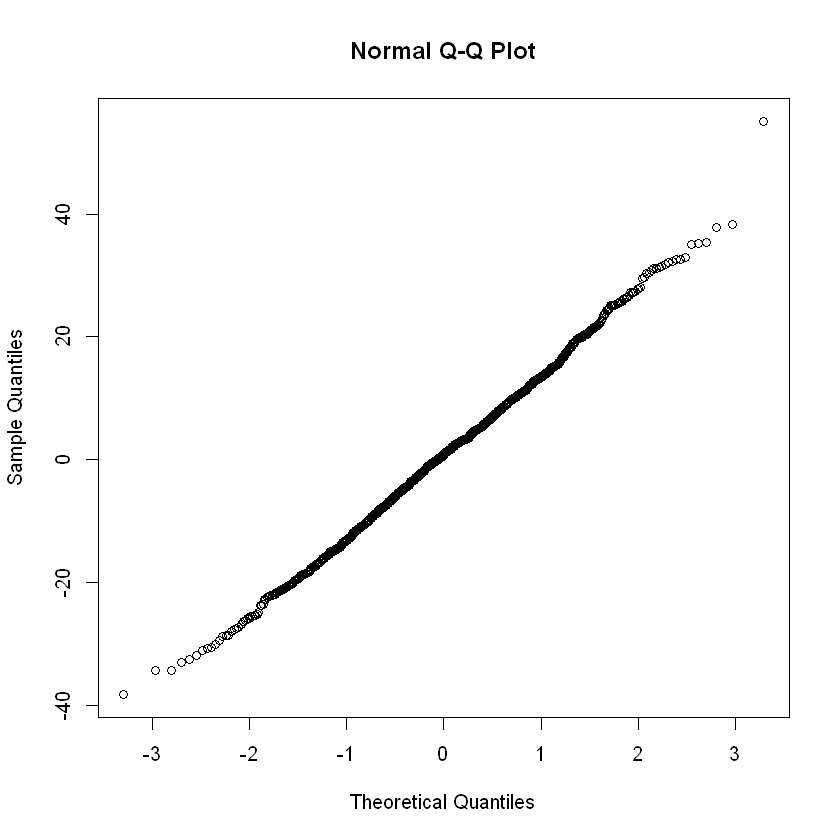

In [3]:
n <- 500
N <- 1000
sums <- rep(0, N)
for(i in 1:N) sums[i]<-func(n)
hist(sums)
qqnorm(sums)

Now adjust the function `func` so that it returns a list containing the sample variance as well as the sum for each sample $x$.

In [4]:
func <- function(n){
  x <- runif(n,min=-1,max=1)
  list(sum=sum(x),var=var(x))
}

Use the adjusted function to generate a sample of size $N = 1000$ for the standardised sum $Z_s$. Note that the mean $\mu$ for the distribution of $X_i$ is $0$ and the variance $\sigma^2$ can be approximated by the sample variance for each $x$. Use a histogram of the result and `qqnorm` as before to check that the standardised sum $Z_s$ follows a standard normal distribution.

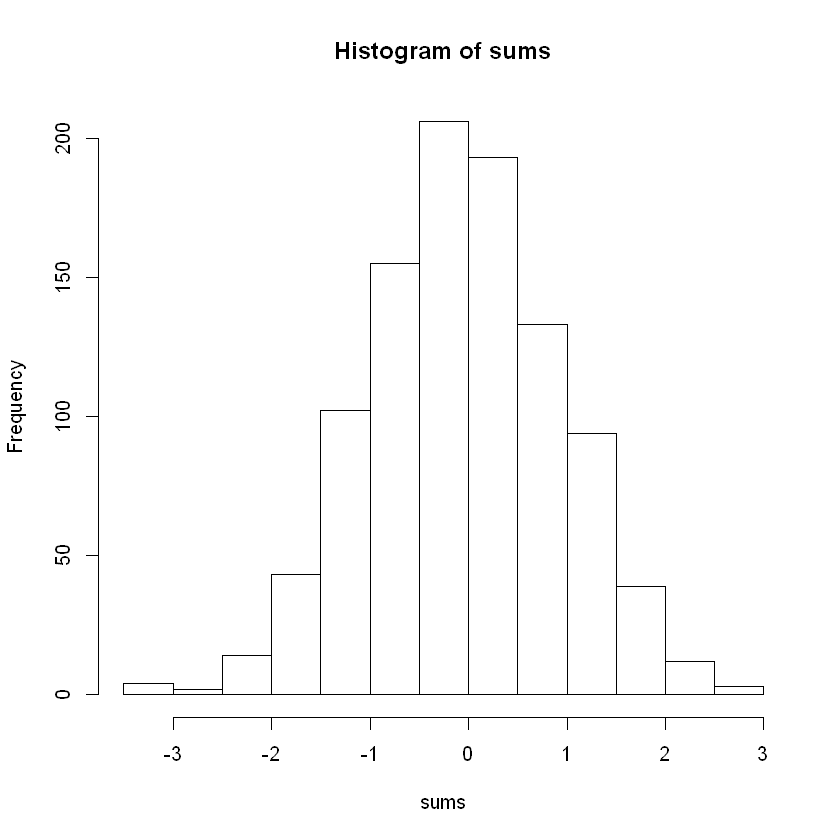

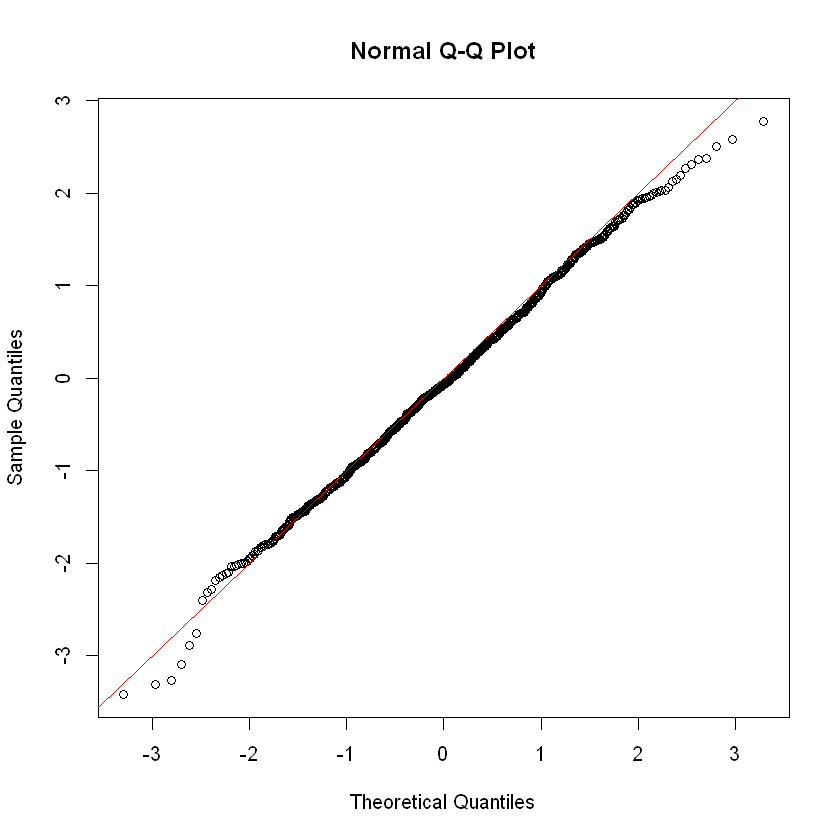

In [15]:
for(i in 1:N){
  func.result<-func(n)
  sums[i]<-func.result$sum/sqrt(n*func.result$var)
}
hist(sums)
qqnorm(sums)
abline(0,1,col="red")

## Information: 2

Data in `R` are often held in data frames. 
A data frame is a table in which each column is a vector containing the values of one variable. 
The variables can be of either numeric, factor or character type.

One of the built in datasets in R is called `trees`. Use the command `dat <- trees` to create a new data 
frame with this data.

In [8]:
dat<-trees

Have a look at the data using, for example, `summary(dat)` and `pairs(dat)`.

     Girth           Height       Volume     
 Min.   : 8.30   Min.   :63   Min.   :10.20  
 1st Qu.:11.05   1st Qu.:72   1st Qu.:19.40  
 Median :12.90   Median :76   Median :24.20  
 Mean   :13.25   Mean   :76   Mean   :30.17  
 3rd Qu.:15.25   3rd Qu.:80   3rd Qu.:37.30  
 Max.   :20.60   Max.   :87   Max.   :77.00  

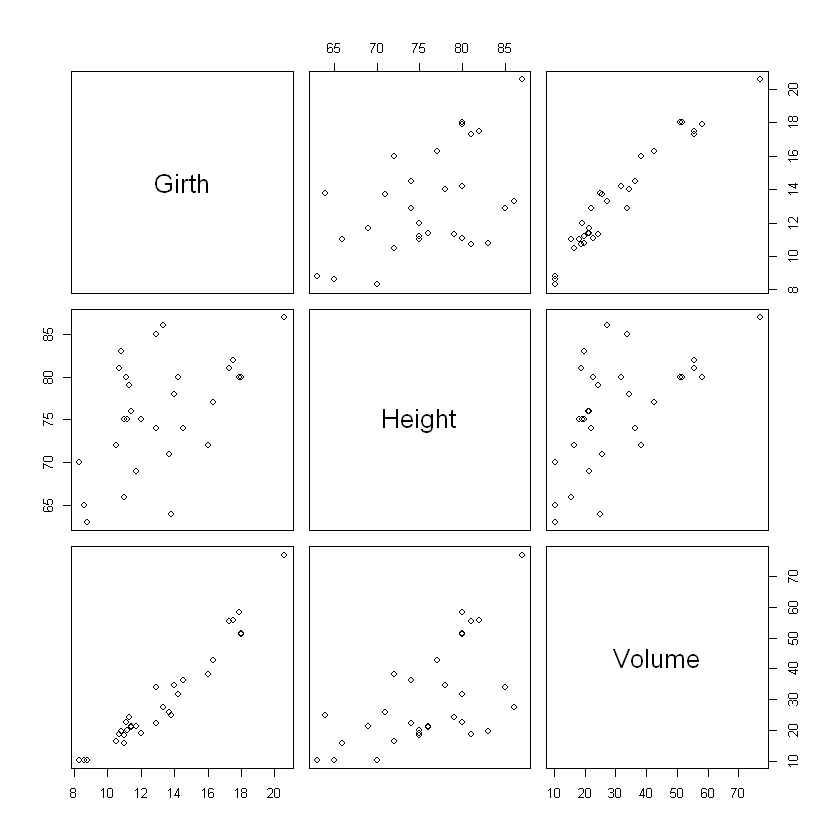

In [9]:
summary(dat)
pairs(dat)

Fit a simple linear model with response variable `Volume` and predictor variable `Girth`, storing the results as an object `mod`.

In [10]:
mod<-lm(Volume~Girth,data=dat)

Use `plot(mod)` and `summary(mod)` to assess the goodness of fit of the model. Does `Girth` predict `Volume` well?


Call:
lm(formula = Volume ~ Girth, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-8.065 -3.107  0.152  3.495  9.587 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.9435     3.3651  -10.98 7.62e-12 ***
Girth         5.0659     0.2474   20.48  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.252 on 29 degrees of freedom
Multiple R-squared:  0.9353,	Adjusted R-squared:  0.9331 
F-statistic: 419.4 on 1 and 29 DF,  p-value: < 2.2e-16


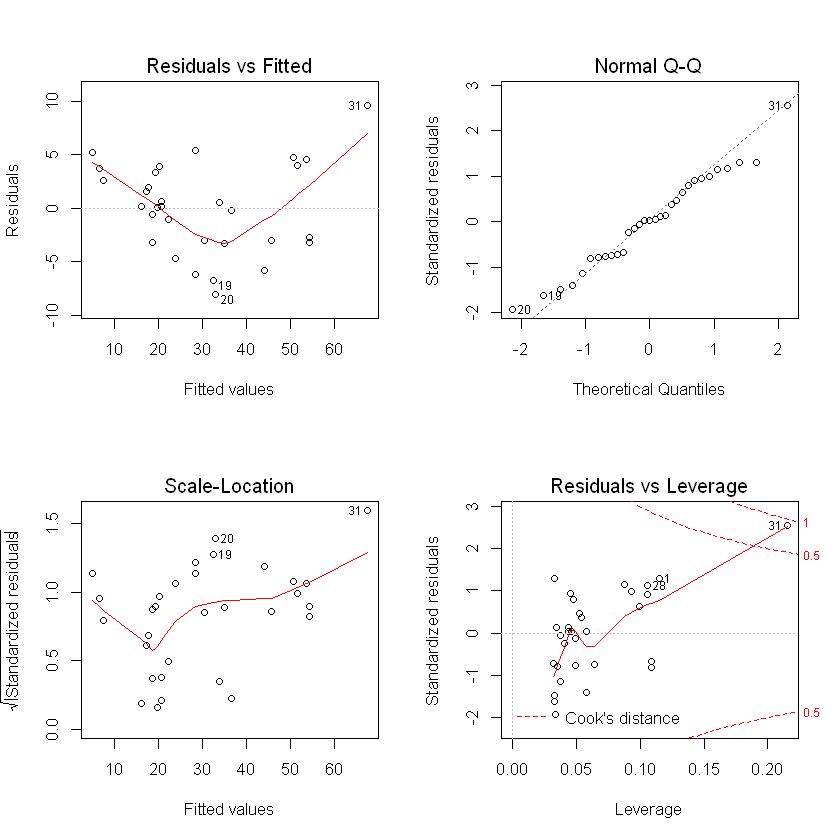

In [11]:
par(mfrow=c(2,2))
plot(mod)
summary(mod)

From the formula for the volume of a cylinder, we may expect the variable `Girth`$^2$ to be a better predictor for `Volume`. Add this variable as a new column `Girth2` to the data frame dat.

In [12]:
dat$Girth2<-dat$Girth^2

Fit a linear model as before but with `Girth` replaced by `Girth2`. Did this improve the model?


Call:
lm(formula = Volume ~ Girth2, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2475 -2.5738  0.2556  2.1341  7.0061 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.355142   1.416902  -2.368   0.0248 *  
Girth2       0.181173   0.006923  26.169   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.37 on 29 degrees of freedom
Multiple R-squared:  0.9594,	Adjusted R-squared:  0.958 
F-statistic: 684.8 on 1 and 29 DF,  p-value: < 2.2e-16


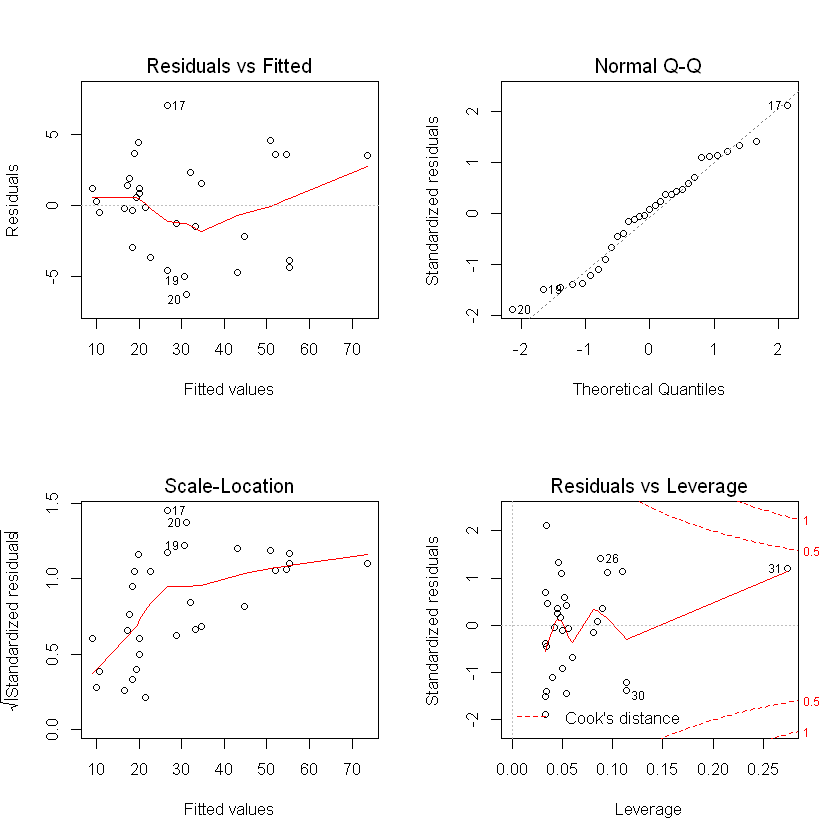

In [17]:
mod2<-lm(Volume~Girth2,data=dat)
par(mfrow=c(2,2))
plot(mod2)
summary(mod2)